In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
l = pd.read_csv("/content/TrafficLR.csv")

In [ ]:
l.head(20)
l.isnull().sum()

Traffic Length       0
Green Signal Time    0
dtype: int64

In [ ]:
l.shape

(15, 2)

In [ ]:
l.drop_duplicates
l

,Traffic Length,Green Signal Time
0,5,10
1,6,14
2,7,15
3,8,17
4,10,18
5,15,24
6,22,30
7,23,38
8,24,46
9,27,52


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb77890fd0>,
      dtype=object)

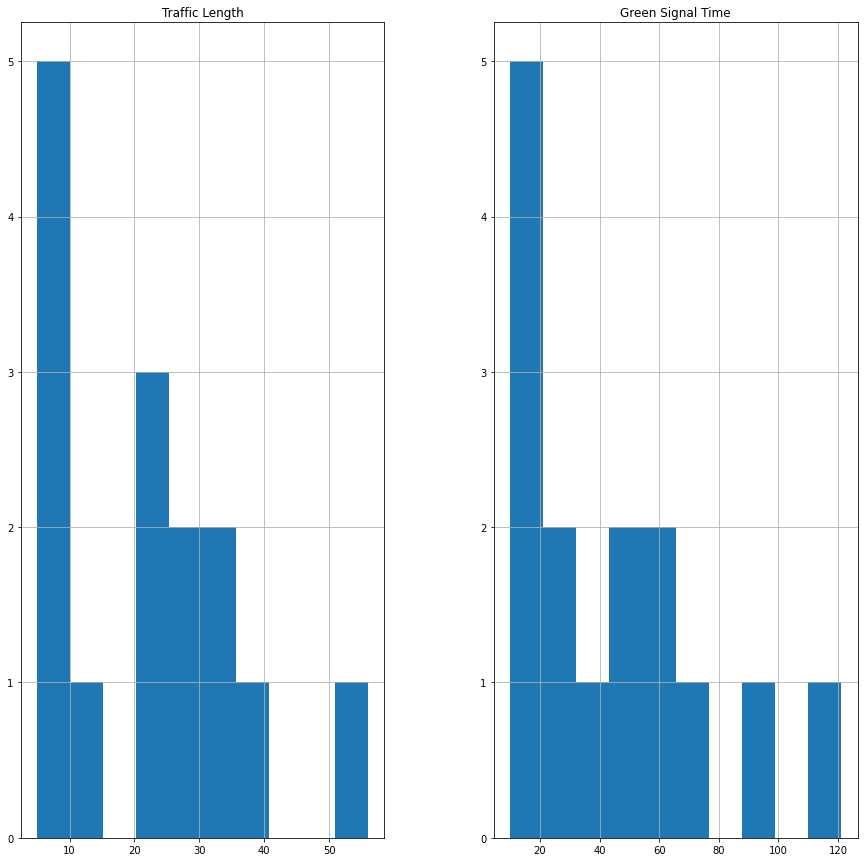

In [ ]:
l.hist(figsize=(15,15), bins=10)

In [ ]:
x= l[['Traffic Length']]
y= l[['Green Signal Time']]


x.head()


,Traffic Length
0,5
1,6
2,7
3,8
4,10


In [ ]:
y.head()

,Green Signal Time
0,10
1,14
2,15
3,17
4,18


In [ ]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()
m1.fit(x,y)   #creates the model

LinearRegression()

In [ ]:
y_predict = m1.predict(x)
y_predict

array([[  6.32150971],
       [  8.50609728],
       [ 10.69068484],
       [ 12.87527241],
       [ 17.24444754],
       [ 28.16738536],
       [ 43.45949831],
       [ 45.64408587],
       [ 47.82867344],
       [ 54.38243613],
       [ 60.93619882],
       [ 65.30537395],
       [ 69.67454908],
       [ 76.22831177],
       [117.73547549]])

In [ ]:
y

,Green Signal Time
0,10
1,14
2,15
3,17
4,18
5,24
6,30
7,38
8,46
9,52


In [ ]:
# m1.coef_
m1.intercept_

array([-4.60142811])

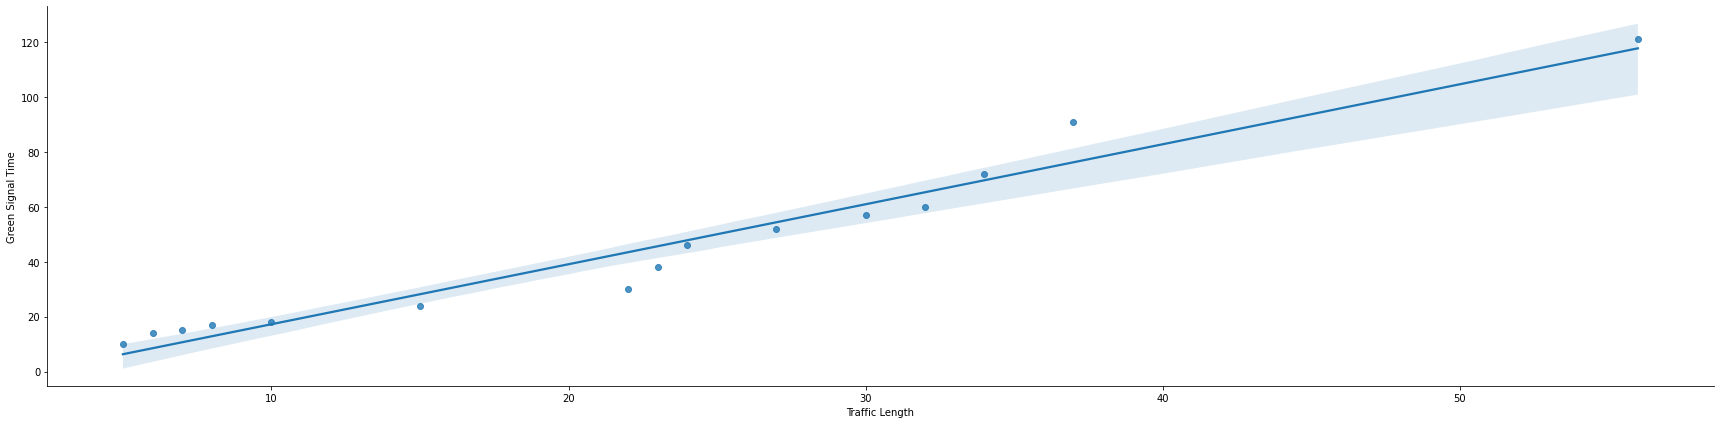

In [ ]:
sns.lmplot(x='Traffic Length',y='Green Signal Time',data=l,aspect=4,height=6)

In [ ]:
a = pd.read_csv("/content/Salary_Data.csv")
a.head(10)
x = a.iloc[:, :-1].values
y = a.iloc[:, -1].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.4)


from sklearn.linear_model import LinearRegression

m2 = LinearRegression()

m2.fit(x_train, y_train)
y_pred = m2.predict(x_test)
y_pred

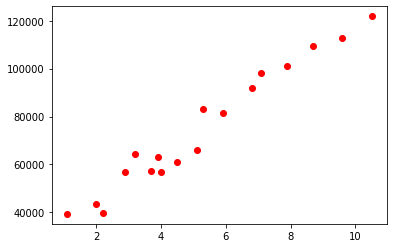

In [ ]:
plt.scatter(x_train,y_train, color = 'red' )


In [ ]:
plt.scatter(x,y, color = 'red' )
plt.plot(x, y_pred, color="blue")
plt.title("Salary vs Experience")
plt.xlabel("years")
plt.ylabel("Salary")
plt.show()

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Multiple linear regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/homeprice.csv") 
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,5650000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
import math
median_bed = math.floor(df.bedrooms.median())
median_bed


3

In [ ]:
df['bedrooms'] = df.bedrooms.fillna(median_bed)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,5650000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(df[['area','bedrooms','age']], df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  -4185., 3864000.,  222000.])

In [ ]:
reg.intercept_

-2590999.9999999898

In [ ]:
reg.predict([ [3000,4,15] ])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3640000.])

Hiring an emp


In [ ]:
df = pd.read_csv("/content/hiring.csv")

df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [ ]:
df.experience = df.experience.fillna("0")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
import math
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score) 
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit( df[['experience','test_score(out of 10)', 'interview_score(out of 10)']] , df['salary($)'])



LinearRegression()

In [ ]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([93747.79628651])

HW


In [ ]:
#@title Default title text
df = pd.read_csv("/content/Customers.csv - Customers.csv.csv")
df.isnull().sum()
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
from sklearn.linear_model import LinearRegression

h = LinearRegression()
h

LinearRegression()

In [ ]:
x = df[ ['Age','Annual Income (k$)'] ]
y = df[ ['Spending Score (1-100)'] ]

In [ ]:
h.fit(x,y)
spend_predict = h.predict(x)

In [ ]:
sample = h.predict([[21, 15]])
sample

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[60.73354819]])

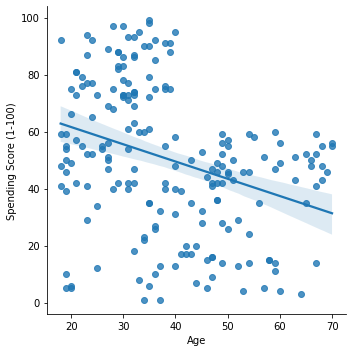

In [ ]:
sns.lmplot(x='Age', y='Spending Score (1-100)',data=df)

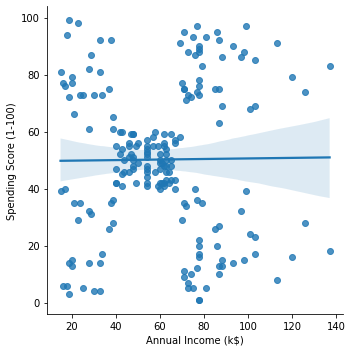

In [ ]:
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=df)


In [ ]:
x_acc = df.Age
from sklearn.metrics import accuracy_score
x_acc
# a = accuracy_score( x_acc , spend_predict])

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64